In [63]:
%reset -f
import numpy as np
import torch
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import gym

from gym.envs.toy_text.frozen_lake import generate_random_map

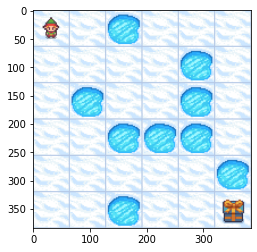

In [64]:
size = 6
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

In [65]:
action_values = np.zeros(shape=(size**2,4))

In [66]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [67]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [68]:
sarsa(action_values, policy, 200000)

In [69]:
np.argmax(action_values,axis=1).reshape(size,size)

array([[1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 3, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [2, 2, 2, 1, 1, 0],
       [3, 3, 0, 2, 2, 0]])

In [60]:
 # - 0: LEFT
 #    - 1: DOWN
 #    - 2: RIGHT
 #    - 3: UP

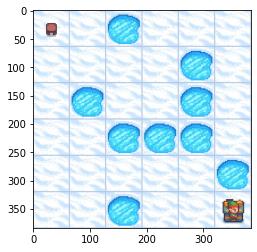

In [70]:
plt.imshow(env.render(mode="rgb_array"))

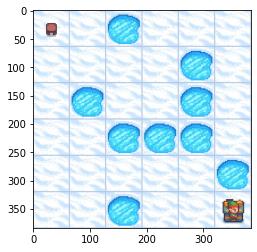

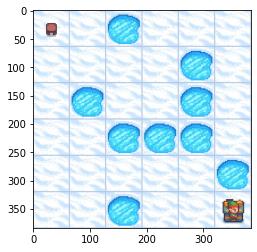

In [71]:
import time
state = env.reset()
action = policy(state, epsilon=0)
done = False
while not done:
    plt.cla()
    next_state, reward, done, _ = env.step(action)
    action = policy(next_state, epsilon=0)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()